In [1]:
# fazer a rede newral com mais uma camada, depois deixar adaptavel isso

In [1]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def sigma(z):
    return 1/(1 + np.exp(-z))
# w --> peso, grad_w --> grad de w, n --> relaxação
def grad_descend_2(w,jacob_C,grad_C_y,n):
    w =w - n * jacob_C.T @ grad_C_y
    return w

def grad_descend(w,grad_C,n):
    w = w - n * grad_C
    return w
# cost functions
def C (output,expected):
    cost = (expected - output)**2
    return np.mean(cost)
# z function
def z(sigma,w,x,b):
    return sigma(w @ x + b)

def delta_out(output,expected):
    return 2*(expected - output)*output * (1 - output)
 
#fazer por neuronio
# value e o valor obtido, delta_mais um e o delta de todos os neuronios da camada seguinta, w pessos em relação a camada seguite
def delta(delta_l_mais_1,w,value):
    delta_l_minos_1 = np.dot(delta_l_mais_1 , w) * ( value * (1-value) )
    return delta_l_minos_1



In [12]:
# newral check
class newral:
    
    def __init__(self,input_size):
        # inputs 
        self.h_l_1size = 128
        self.h_l_2size = 64
        self.input_size = input_size 
        self.output_size  = 10
        
        
        # criando os vetores intermediarios
        self.y1 = np.zeros(self.h_l_1size)
        self.y2 = np.zeros(self.h_l_2size)
        self.y3 = np.zeros(self.output_size)
        
        
        #-----------------------------#
        # input vector
        self.x = np.zeros(self.input_size)

        
        # weight 0_1 # fazer a inicialização xavier
        self.w_0_1 = np.random.randn(self.h_l_1size,self.input_size)  * np.sqrt(1.0/ self.input_size)
        
        # bias 1
        self.b_1 = np.random.randn(self.h_l_1size) * np.sqrt(1.0/ self.h_l_1size)
        
        # weight 1_2 # fazer a inicialização xavier
        self.w_1_2 = np.random.randn(self.h_l_2size,self.h_l_1size)  * np.sqrt(1.0/ self.h_l_1size)
        
        # bias 2
        self.b_2 = np.random.randn(self.h_l_2size) * np.sqrt(1.0/ self.h_l_2size)
        
        
        # weight 2_3
        self.w_2_3 = np.random.randn(self.output_size,self.h_l_2size) *  np.sqrt(1.0/ self.h_l_2size)
        
        # bias 3
        self.b_3 = np.random.randn(self.output_size) * np.sqrt(1.0/ self.output_size)



    def thinking(self,input_):
        
        # dou meu input
        self.x = input_
        
        # hl1
        z1 = self.w_0_1 @ self.x + self.b_1
        self.y1 = sigma(z1)
        
        # hl1
        z2 = self.w_1_2 @ self.y1 + self.b_2
        self.y2 = sigma(z2)
        
        #output
        z3 = self.w_2_3 @ self.y2 + self.b_3
        self.y3 = sigma(z3)
        
        return self.y3


In [13]:
rede_test = newral(100)
np.shape(rede_test.y3)

(10,)

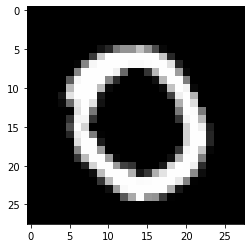

In [14]:
# Loading the images
train = np.array(pd.read_csv('archive/mnist_train.csv'))
np.random.shuffle(train) 
train_tag = train[:,0]
train = train / 255.0
 
# a linhas tem o label e a imagem
plt.imshow(train[1,1:].reshape(28, 28),cmap = 'gray')

In [15]:
# veotor resultado
expected = np.zeros(10)
expected[train_tag[1]]= 1
np.shape(train)
expected,train_tag[1]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0)

In [16]:
# ciclo e treinameto da minha rede
# ---> iniciando minhas rede
n_inputs = 784
rede = newral(n_inputs)

In [17]:
# -------------------------- #
#size_delta_l_menos_1 = rede.h_l_size
dataset_len = 32
number_of_cicles = 60000//dataset_len
x_input = np.zeros((dataset_len,rede.input_size))


y3 = np.zeros((dataset_len,rede.output_size))
y2 = np.zeros((dataset_len,rede.h_l_2size))
y1 = np.zeros((dataset_len, rede.h_l_1size))

expected = np.zeros((dataset_len, rede.output_size))
n = 100
l = 0
i = 0

In [18]:
# local onde serão armazenados os deltas
deltas_L1 = np.zeros((dataset_len, rede.h_l_1size))
deltas_L2 = np.zeros((dataset_len,rede.h_l_2size))
deltas_L3 = np.zeros((dataset_len,rede.output_size))

# calculando o delta da camada anterior
size_w_1_2 = np.size(rede.w_1_2[0,:])
size_w_2_3 = np.size(rede.w_2_3[0,:])

while l < number_of_cicles:
    # Deltas

    #Calculando os deltas de um dataset
    for i in range (dataset_len):
        # ---> guardando meu primeito output numa variavel, train é minha matriz com os valores e o label
        x_input[i,:] = train[i + l*dataset_len,1:]
        # o vetor esperado
        expected[i, train_tag[i + l*dataset_len]] = 1
        
        # minhas rede pensando
        y3[i,:] = rede.thinking(x_input[i,:])
        y2[i,:] = rede.y2
        y1[i,:] = rede.y1
        
        #calculando a função custo
        #cost = C(y2[i,:] , expected[])

        # calculando o delta da primeira camanda
        deltas_L3[i,:] = delta_out(y3[i,:],expected[i,:])

    # calculando o delta da camada anterior
    size_w_1_2 = np.size(rede.w_1_2[0,:])
    size_w_2_3 = np.size(rede.w_2_3[0,:])

    # calculo os meus deltas da camada 3 pra 2
    
    deltas_L2 = delta(deltas_L3,rede.w_2_3,y2)
    
        
        
    # calculo os meus deltas da camada 2 para 1
    
    deltas_L1 = delta(deltas_L2,rede.w_1_2,y1)
    
        
    
    

    
    # ja tenho os deltas calculados tenho que calcular agora os valores dos gradientes, de todas as imagens
    
    gradient_w_2_3_x = np.zeros((rede.output_size,rede.h_l_2size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.output_size):
            gradient_w_2_3_x[k,:,i] = deltas_L3[i,k] * y2[i,:]
        
    
    gradient_w_1_2_x = np.zeros((rede.h_l_2size,rede.h_l_1size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.h_l_2size):
            gradient_w_1_2_x[k,:,i] = deltas_L2[i,k] * y1[i,:]
        

    gradient_w_0_1_x = np.zeros((rede.h_l_1size,rede.input_size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.h_l_1size):
            gradient_w_0_1_x[k,:,i] = deltas_L1[i,k] * x_input[i,:]
        
        
              
        
        
    # calcular a media por interação agora
    gradient_w_2_3 = np.zeros((rede.output_size,rede.h_l_2size))
    gradient_w_1_2 = np.zeros((rede.h_l_2size,rede.h_l_1size))
    gradient_w_0_1 = np.zeros((rede.h_l_1size,rede.input_size))

    i = 0
    k = 0
    for i in range(rede.output_size):
        for k in range(rede.h_l_2size):
            gradient_w_2_3[i,k] = np.mean(gradient_w_2_3_x[i,k,:]) 
    
        
    
    i = 0
    k = 0
    for i in range(rede.h_l_2size):
        for k in range(rede.h_l_1size):
            gradient_w_1_2[i,k] = np.mean(gradient_w_1_2_x[i,k,:]) 
        
        
    i = 0
    k = 0
    for i in range(rede.h_l_1size):
        for k in range(rede.input_size):
            gradient_w_0_1[i,k] = np.mean(gradient_w_0_1_x[i,k,:])
        

        
    # agora a medias das bias
    grad_bias_1 = np.zeros(rede.h_l_1size)
    grad_bias_2 = np.zeros(rede.h_l_2size)
    grad_bias_3 = np.zeros(rede.output_size)

    i = 0
    for i in range(rede.h_l_1size):
        grad_bias_1[i] = np.mean(deltas_L1[:,i]) 
    k = 0
    for k in range(rede.h_l_2size):
        grad_bias_2[k] = np.mean(deltas_L2[:,k])
        
    k = 0
    for k in range(rede.output_size):
        grad_bias_3[k] = np.mean(deltas_L3[:,k])
# atualizando os gradientes(w,grad,n)

    rede.w_0_1 -= n*gradient_w_0_1
    rede.w_1_2 -= n*gradient_w_1_2
    rede.w_2_3 -= n*gradient_w_2_3
    rede.b_1 -= n*grad_bias_1
    rede.b_2 -= n*grad_bias_2
    rede.b_3 -= n*grad_bias_3
# atualizando o l
    l += 1

ValueError: operands could not be broadcast together with shapes (64,128) (32,128) 

In [10]:
print(rede.thinking(train[1,1:]))
print(train_tag[1])
rede.w_0_1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
4


array([[-0.01265197,  0.02757094, -0.00442454, ..., -0.04730962,
        -0.02542679, -0.03017489],
       [ 0.00213078,  0.00971789,  0.04246354, ..., -0.03127314,
         0.00895615,  0.03405438],
       [-0.0227675 ,  0.04473072,  0.01128088, ...,  0.00988926,
         0.00449437,  0.03052402],
       ...,
       [ 0.0110726 ,  0.00481048, -0.05086392, ..., -0.02339526,
         0.03633406, -0.04095546],
       [-0.00358397, -0.04530524,  0.0034979 , ...,  0.00040931,
         0.02202886, -0.01522455],
       [-0.04036826,  0.0223252 , -0.04499969, ..., -0.01184392,
         0.00212615, -0.03066043]])